In [5]:
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.interpolate import interp1d
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist

In [6]:
def generate_pyramid(path):
    plt.figure(figsize=(4, 4))
    x_coords = [pair[0] for pair in path]
    widths = [pair[1] for pair in path]
    y_coords = [1-i for i in widths]

    plt.plot(x_coords, y_coords, color='dodgerblue', linestyle='-')

    left_edges = []
    right_edges = []
    for pair in path:
        x = pair[0]
        width = pair[1]
        height = 1-width
        
        x_left = x-(width/2)
        x_right = x+(width/2)

        left_edges.append([x_left,height])
        right_edges.append([x_right,height])

        plt.plot([x_left, x_right], [height, height], color='gray', linestyle='-')
    
    left_x = [coord[0] for coord in left_edges]
    left_y = [coord[1] for coord in left_edges]
    plt.plot(left_x, left_y, color='gray', linestyle='-')
    
    right_x = [coord[0] for coord in right_edges]
    right_y = [coord[1] for coord in right_edges]
    plt.plot(right_x, right_y, color='gray', linestyle='-')

    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.grid()
    plt.show()  


In [7]:
def generate_polygon(set1, set2):

    x_coord1 = [element[0] for element in set1] # midpoint x-value
    widths1  = [element[1] for element in set1] # interval width for a midpoint
    x_coord2 = [element[0] for element in set2]
    widths2  = [element[1] for element in set2]

    tol = 1e-8
    if not((np.all(np.abs(np.diff(x_coord1)/np.diff(widths1)) <= 1/2 + tol)) and (np.all(np.abs(np.diff(x_coord2)/np.diff(widths2)) <= 1/2 + tol))):
        print("invalid path")
        return

    generate_pyramid(set1)
    generate_pyramid(set2)

    path1 = interp1d(widths1, x_coord1, kind='linear')
    path2 = interp1d(widths2, x_coord2, kind='linear')

    for width2 in widths2:
       width1 = 1 - width2
       if width1 not in widths1:
           new_point = [path1(width1), width1]
           index = 0
           while index < len(widths1) and widths1[index] < width1:
               index += 1

           set1.insert(index, new_point)
           widths1.insert(index, width1)
           x_coord1.insert(index, path1(width1))
    
    polygon_points = []
    basis_points = []

    for i in range(len(set1)):
        x_midpoint = x_coord1[i]
        width = widths1[i]

        y_midpoint = path2(1-width).item()
        y_width = 1-width

        x_left  = x_midpoint - (width/2)
        x_right = x_midpoint + (width/2)
        y_left  = y_midpoint - (y_width/2)
        y_right = y_midpoint + (y_width/2)

        left_bottom = [x_left, y_left]
        right_bottom = [x_right, y_left]
        left_top = [x_left, y_right]
        right_top = [x_right, y_right]

        polygon_points.append([left_bottom, right_bottom, left_top, right_top])
        basis_points.append([x_midpoint, y_midpoint])

    points = np.array(polygon_points)

    plt.figure(figsize=(5, 5))

    for i in range(4): # 4 sets that make up a rectangle
        x_coords = points[:, i, 0]  # All x-coords for corner i
        y_coords = points[:, i, 1]  # All y-coords for corner i
        plt.plot(x_coords, y_coords, color='dodgerblue', linestyle='-')

    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.grid()
    plt.show()

    def polygon_area(points):
        """Shoelace formula for polygon area"""
        x = points[:,0]
        y = points[:,1]
        return 0.5 * np.abs(np.dot(x, np.roll(y, -1)) - np.dot(y, np.roll(x, -1)))

    bottom = points[:,0]        # left_bottoms
    right  = points[::-1,1]     # right_bottoms (reversed upward)
    top    = points[:,3]        # right_tops
    left   = points[::-1,2]     # left_tops (reversed downward)

    boundary = np.vstack([bottom, right, top, left])
    A = polygon_area(boundary)
    print("Outer boundary area:", A)


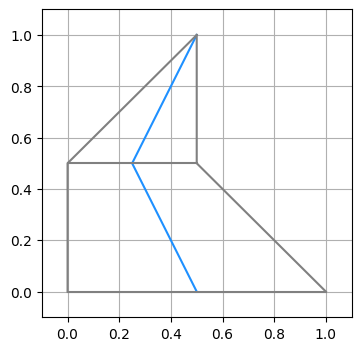

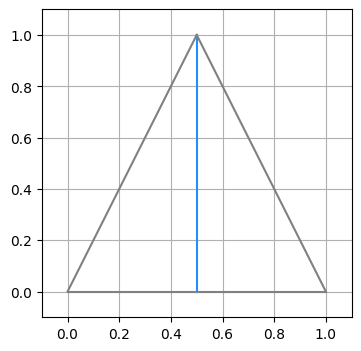

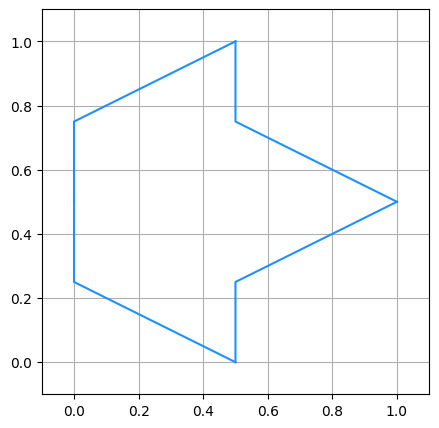

Outer boundary area: 0.5


In [8]:
# set1 = [
#     [1/3, 0],
#     [1/6, 1/3],
#     [1/2, 1]
# ]
# set2 = [
#     [2/3, 0],
#     [5/6, 1/3],
#     [1/2, 1]
# ]

set1 = [
    [1/2,0],
    [1/4, 1/2],
    [1/2,1]
]
set2 = [
    [1/2,0],
    [1/2,1]
]

# set1 = [
#     [1/2,0],
#     [1/2,1]
# ]
# set2 = [
#     [1/2,0],
#     [1/2,1]
# ]

# set1 = [
#     [1/3, 0],
#     [1/6, 1/3],
#     [1/2, 1]
# ]
# set2 = [
#     [2/3, 0],
#     [5/6, 1/3],
#     [1/2, 1]
# ]

generate_polygon(set1, set2)